<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/IMDB_SimpleRNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

## Data Loading and Processing

In [ ]:
## Data processing

In [ ]:
max_features = 10000 # number of words to consider as features
maxlen = 500 # cuts off text after this many words (among the max_features more common words)
batch_size = 32

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 2s 0us/step


In [ ]:
len(input_train), len(input_test)

(25000, 25000)

In [ ]:
input_train.shape, input_test.shape

((25000,), (25000,))

In [ ]:
# We pad the sequences

In [ ]:
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)

In [ ]:
input_train.shape, input_test.shape

((25000, 500), (25000, 500))

## Simple RNN Model

In [ ]:
## The SimpleRNN model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(input_train,y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split = 0.2) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6314 - acc: 0.6338 - val_loss: 0.4527 - val_acc: 0.8090
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.3972 - acc: 0.8342 - val_loss: 0.3989 - val_acc: 0.8234
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2817 - acc: 0.8885 - val_loss: 0.3305 - val_acc: 0.8704
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2216 - acc: 0.9161 - val_loss: 0.3904 - val_acc: 0.8328
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1649 - acc: 0.9398 - val_loss: 0.5511 - val_acc: 0.7530
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1116 - acc: 0.9602 - val_loss: 0.4663 - val_acc: 0.8144
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0736 - acc: 0.9761 - val_loss: 0.5418 - val_acc:

In [ ]:
import matplotlib.pyplot as plt

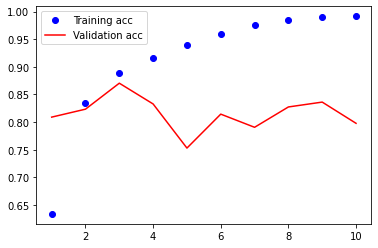

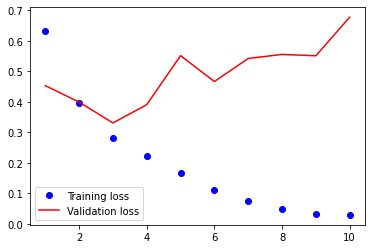

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'r',label = 'Validation acc')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
plt.legend()
plt.show()

In [ ]:
## The reason of this NN underperforming is that SimpleRNN aren't at processing long sequences, such as text.

## LSTM RNN Model

In [ ]:
## We try a LSTM RNN:

In [ ]:
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(input_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.5145 - acc: 0.7627 - val_loss: 0.4046 - val_acc: 0.8258
Epoch 2/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2947 - acc: 0.8826 - val_loss: 0.3482 - val_acc: 0.8448
Epoch 3/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2347 - acc: 0.9104 - val_loss: 0.3225 - val_acc: 0.8742
Epoch 4/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2010 - acc: 0.9276 - val_loss: 0.3154 - val_acc: 0.8636
Epoch 5/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1767 - acc: 0.9362 - val_loss: 0.2910 - val_acc: 0.8858
Epoch 6/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1588 - acc: 0.9448 - val_loss: 0.2981 - val_acc: 0.8858
Epoch 7/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.1469 - acc: 0.9484 - val_loss: 0.3425 - val_acc:

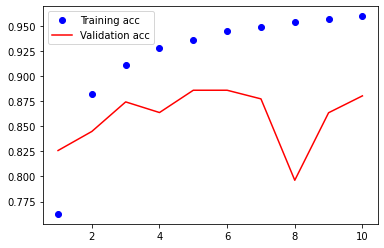

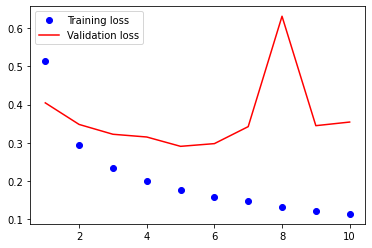

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'r',label = 'Validation acc')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
plt.legend()
plt.show()